<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [32]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [33]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [34]:
X_train , X_test = X_train/255.0 , X_test/255.0

In [35]:
class_name = ['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']

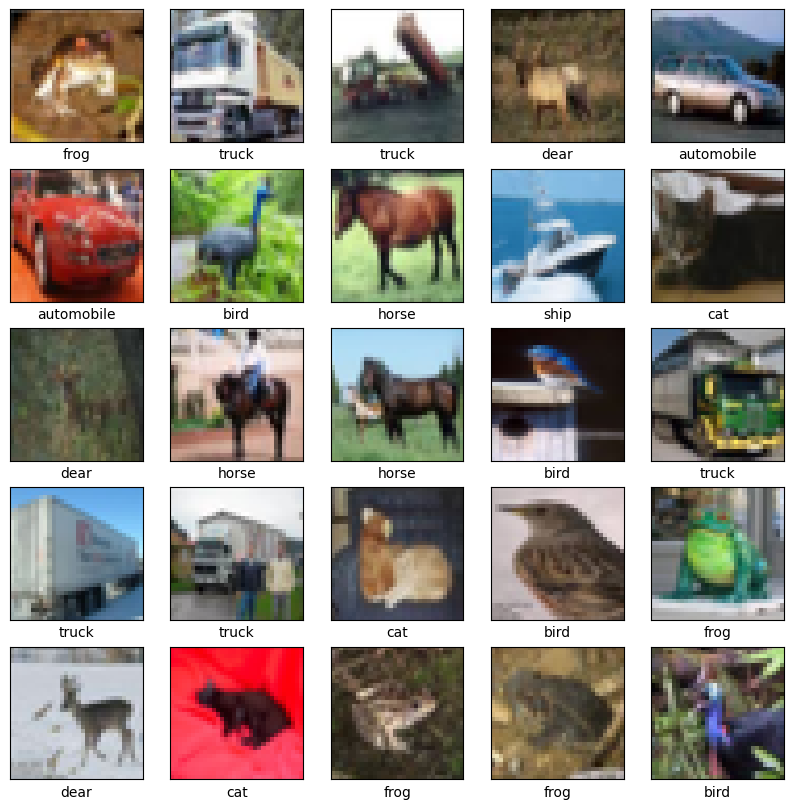

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_name[y_train[i][0]])
plt.show()

In [44]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3), activation = 'relu'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trai

In [46]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 512)              

In [50]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(X_train,y_train,epochs = 10,
                    validation_data = (X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 77s 48ms/step - loss: 1.5868 - accuracy: 0.4218 - val_loss: 1.3054 - val_accuracy: 0.5305
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2439 - accuracy: 0.5577 - val_loss: 1.1807 - val_accuracy: 0.5714
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1113 - accuracy: 0.6089 - val_loss: 1.1420 - val_accuracy: 0.5936
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0230 - accuracy: 0.6391 - val_loss: 1.0450 - val_accuracy: 0.6339
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9630 - accuracy: 0.6603 - val_loss: 0.9851 - val_accuracy: 0.6543
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9090 - accuracy: 0.6785 - val_loss: 0.9423 - val_accuracy: 0.6661
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8681 - accuracy: 0.6950 - val_loss: 0.9327 -

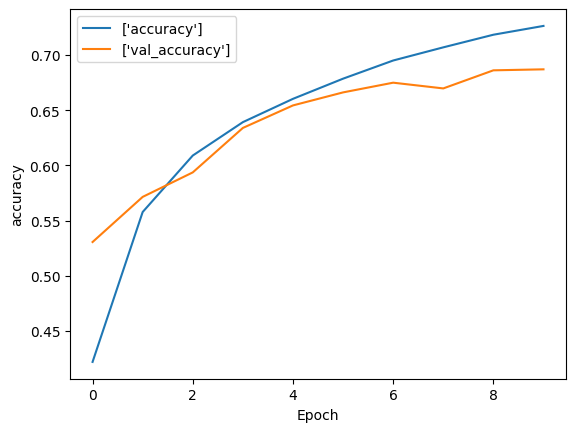

In [51]:
plt.plot(history.history['accuracy'],label=['accuracy'])
plt.plot(history.history['val_accuracy'],label=['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()